<h1 align="center"><b>AI Lab: Computer Vision and NLP</b></h1>
<h3 align="center">Lecture 08: Bitwise Operators, Real Time Filtering, Image operations</h3>

---

We did, in the previous file, a filtering of a single image. But we can also do it with a real time camera, and thus filter in real time the output of the camera.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
capture = cv2.VideoCapture(0)

We can also perform the following:

In [4]:
while True:
    ret, frame = capture.read()
    # Bring the image to grayscale
    image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Soft clean the image
    image_gray = cv2.medianBlur(image_gray, 5)

    # Use the Laplacian filter in order to extract the contours
    edges = cv2.Laplacian(image_gray, cv2.CV_8U, ksize=5)

    # Threshold the edges in order to get only some valid edges (so with value greater than 70)
    ret, threshold = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)

    # Now we can extract the colors. We can use the bilateral filter with high values, so that we can keep some edges
    color_image = cv2.bilateralFilter(frame, 10, 250, 250)

    # Put together the two images, so the color and the sketch
    sketch = cv2.cvtColor(threshold, cv2.COLOR_GRAY2BGR)

    # Do the bitwise of the two images and merge the sketch and the color
    final_image = cv2.bitwise_and(color_image, sketch)

KeyboardInterrupt: 

Consider two pixels, $x$ and $y$, and suppose that we want to do $x + y$. Let's try to add them with both `cv2` and `numpy`:

In [11]:
x = np.uint8([250])
y = np.uint8([50])

result_opencv = cv2.add(x, y)
result_np = x + y

print("Result of OpenCV: \n", result_opencv, "\n\nResult of numpy: \n", result_np)

Result of OpenCV: 
 [[300.]
 [  0.]
 [  0.]
 [  0.]] 

Result of numpy: 
 [44]


There are substantial differences between the two results: in `OpenCV` the operation is done at multiple levels, while in `numpy` the result overflows once it reaches `255`.

Let's try with a different operation, which will use a random image:

In [3]:
image = cv2.imread("imgs/05_imgs/whypassexams.jpeg")
M = np.full(image.shape, 50, dtype="uint8")

addition = cv2.add(image, M)
subtraction = cv2.subtract(image, M)

cv2.imwrite("imgs/05_imgs/whyadd.jpg", addition)
cv2.imwrite("imgs/05_imgs/whysub.jpg", subtraction)

True

|Subtracted|Original|Added|
|---|---|---|
|![sub](imgs/05_imgs/whysub.jpg)|![normal](imgs/05_imgs/whypassexams.jpeg)|![add](imgs/05_imgs/whyadd.jpg)|

We can also mix two images

In [3]:
image1 = cv2.imread("imgs/05_imgs/whypassexams.jpeg")
image2 = cv2.imread("imgs/05_imgs/shrek.jpeg")

image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

blend = cv2.addWeighted(image1, 0.25, image2_resized, 0.75, 1)

cv2.imwrite("imgs/05_imgs/blended.jpg", blend)

True

|Image 1|Blended|Image 2|
|---|---|---|
|![img1](imgs/05_imgs/whypassexams.jpeg)|![blend](imgs/05_imgs/blended.jpg)|![img2](imgs/05_imgs/shrek.jpeg)|

## Bitwise operation

In the previous, final code in `06_filters.ipynb`, we made a script which applied a "cartoonish" filter to any given image. At a certain point, we used a function called `cv2.bitwise_and()`. How does it work?

The bitwise **AND** operation receives two inputs and, in the resulting image, it will return in coloured pixels all those pixels whose coordinates in both the first and second image are not equal to 0. There is also the **OR** operator, which does the same of the **AND** operator, except that it uses the **OR** operator between the pixels.

In [25]:
image01 = np.zeros((500, 500), dtype="uint8")
image02 = np.zeros((500, 500), dtype="uint8")

cv2.rectangle(image01, (200, 100), (300, 300), (255, 255, 255), -1)
cv2.rectangle(image02, (50, 50), (350, 300), (255, 255, 255), -1)

bitwise_and = cv2.bitwise_and(image01, image02)
bitwise_or = cv2.bitwise_or(image01, image02)
bitwise_xor = cv2.bitwise_xor(image01, image02)

cv2.imwrite("imgs/05_imgs/image01.jpg", image01)
cv2.imwrite("imgs/05_imgs/image02.jpg", image02)
cv2.imwrite("imgs/05_imgs/and01_02.jpg", bitwise_and)
cv2.imwrite("imgs/05_imgs/or01_02.jpg", bitwise_or)
cv2.imwrite("imgs/05_imgs/xor01_02.jpg", bitwise_xor)

True

|Image 01|Image 02|`AND`|`OR`|`XOR`|
|---|---|---|---|---|
|![image01](imgs/05_imgs/image01.jpg)|![image02](imgs/05_imgs/image02.jpg)|![and](imgs/05_imgs/and01_02.jpg)|![or](imgs/05_imgs/or01_02.jpg)|![xor](imgs/05_imgs/xor01_02.jpg)|

We can use the same logic for applying masks to images:

In [9]:
mask = np.zeros(image2.shape, dtype="uint8")

cv2.rectangle(mask, (200, 100), (500, 350), (255, 255, 255), -1)

masked = cv2.bitwise_and(image2, mask)

cv2.imwrite("imgs/05_imgs/masked_shrek.jpg", masked)

True

|Original|Masked|
|---|---|
|![original](imgs/05_imgs/shrek.jpeg)|![masked](imgs/05_imgs/masked_shrek.jpg)|

## Histograms

We can also build histograms related to images, which will tell us how many pixels are of a certain value.

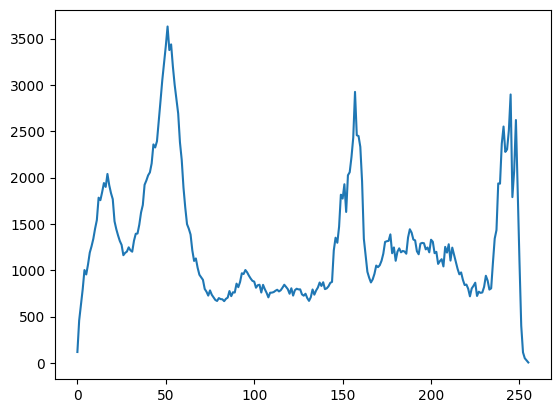

In [14]:
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.plot(hist)
plt.show()

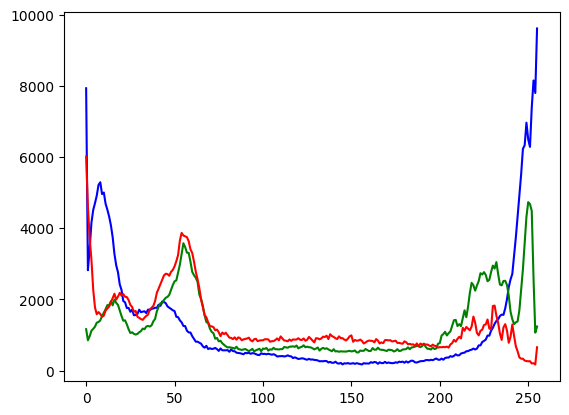

In [5]:
color = ("b", "g", "r")

for i, col in enumerate(color):
    hist = cv2.calcHist([image2], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)

plt.show()

In [6]:
#recover cv2.eqaulizeHist(img01, img02)